# kNN

一般kNN的流程;

(1) 计算已知类别数据集中的点与当前点之间的距离;\

(2) 按照距离递增次序排序;\

(3) 选取与当前点距离最小的k个点;\

(4) 确定前k个点所在类别的出现频率;\

(5) 返回前k个点出现频率最高的类别作为当前点的预测分类。\

更多距离的度量可以在https://my.oschina.net/hunglish/blog/787596 找到

In [39]:
%matplotlib inline
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from collections import Counter

In [6]:
file_path = './datingTestSet.txt'
raw_data = []
labels = []
with open(file_path, 'r') as fp:
    for line in fp.readlines():
        line = line.strip()
        elems = line.split('\t')
        like = elems[3]
        label = 1 if like == 'largeDoses' else 2 if like == 'smallDoses' else 3
        raw_data.append([int(elems[0]), float(elems[1]), float(elems[2])])
        labels.append(label)
        
raw_data = np.array(raw_data)
labels = np.array(labels).reshape(-1,1)

In [19]:
?plt.scatter

(1000, 3)
(1000, 3)


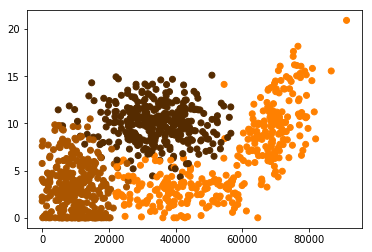

In [35]:
print(raw_data.shape)
colors = np.concatenate((labels/3, labels/6, np.zeros_like(labels)),1)
print(colors.shape)
plt.scatter(raw_data[:,0], raw_data[:,1], c=colors)

## 数据的归一化

由于数据具有不同的单位，因此需要归一化来去除量纲

In [38]:
def normalize(raw_data):
    min_data = np.min(raw_data, 0)
    max_data = np.max(raw_data, 0)
    
    epsilon = np.ones_like(max_data)*1e-6
    ranges = ((max_data-min_data)+epsilon)
    norm_data = (raw_data-min_data)/ranges
    
    return norm_data, max_data, min_data

norm_data, max_data, min_data = normalize(raw_data)
print(">>> raw\n", raw_data[:10,:])
print(">>> norm\n", norm_data[:10,:])

>>> raw
 [[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]
 [7.2993000e+04 1.0141740e+01 1.0329550e+00]
 [3.5948000e+04 6.8307920e+00 1.2131920e+00]
 [4.2666000e+04 1.3276369e+01 5.4388000e-01]
 [6.7497000e+04 8.6315770e+00 7.4927800e-01]
 [3.5483000e+04 1.2273169e+01 1.5080530e+00]]
>>> norm
 [[0.44832535 0.39805137 0.5623332 ]
 [0.15873259 0.34195465 0.98724358]
 [0.28542943 0.06892523 0.474496  ]
 [0.82320073 0.62848004 0.25248914]
 [0.42010233 0.07982026 0.07857825]
 [0.79972171 0.48480187 0.60896019]
 [0.39385141 0.32652984 0.71533474]
 [0.46745478 0.63464539 0.32031172]
 [0.73950675 0.4126121  0.44153611]
 [0.38875681 0.58668979 0.88935953]]


## 最近邻算法

对每个点都计算距离，然后选择k个距离最近的类别作为该点的类别

In [40]:
?np.linalg.norm

In [ ]:
def classfy0(sample, norm_data, labels, k):
    diff = sample - norm_data
    ''' 使用L2范数 '''
    scores = np.linalg.norm(diff, axis=1)
    index = np.arange(scores.shape[0])
    index = sorted()
    